In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = ['Times New Roman']

In [2]:
df_factors = pd.read_csv('./cache/BalancedPanel.csv')

In [3]:
df_factors

,permno,yyyymm,RET,MaxRet,RealizedVol,IdioVol3F,ReturnSkew3F,High52,ReturnSkew,IdioVolAHT,...,DivInit,IndIPO,ExchSwitch,DivOmit,Spinoff,FirmAge,IndMom,betaVIX,VolSD,Mom6m
0,10137.0,197001.0,0.123377,-0.035714,-0.019466,-0.016819,0.160126,0.762376,0.082765,-0.014904,...,0.0,0.0,0.0,0.0,0.0,-530.0,-0.030537,0.001931,-0.072657,-0.004711
1,10137.0,197002.0,0.021040,-0.036364,-0.014232,-0.013282,-0.190259,0.856436,-0.321733,-0.015210,...,0.0,0.0,0.0,0.0,0.0,-531.0,-0.059526,0.001931,-0.069922,-0.054476
2,10137.0,197003.0,-0.080460,-0.042945,-0.019876,-0.015761,1.236047,0.920635,0.763550,-0.015805,...,0.0,0.0,0.0,0.0,0.0,-532.0,0.062296,0.001931,-0.068552,0.046238
3,10137.0,197004.0,-0.068750,-0.017241,-0.009264,-0.008997,0.697642,0.855615,0.368652,-0.015908,...,0.0,0.0,0.0,0.0,0.0,-533.0,0.009572,0.001931,-0.068413,0.013934
4,10137.0,197005.0,-0.049396,-0.027027,-0.014745,-0.012134,-0.196592,0.796791,-0.226604,-0.016336,...,0.0,0.0,0.0,0.0,0.0,-534.0,-0.020445,0.001931,-0.069392,0.006259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608252,11267.0,202407.0,-0.048828,-0.043478,-0.022724,-0.016043,-0.822875,0.683908,0.045570,-0.017291,...,0.0,0.0,0.0,0.0,0.0,-441.0,0.175894,-0.000780,-1.677947,-0.119106
608253,11267.0,202408.0,0.059548,-0.043478,-0.022724,-0.016043,-0.822875,0.683908,0.045570,-0.017291,...,0.0,0.0,0.0,0.0,0.0,-441.0,0.175894,-0.000780,-1.677947,-0.119106
608254,11267.0,202409.0,0.308617,-0.043478,-0.022724,-0.016043,-0.822875,0.683908,0.045570,-0.017291,...,0.0,0.0,0.0,0.0,0.0,-441.0,0.175894,-0.000780,-1.677947,-0.119106
608255,11267.0,202410.0,-0.511485,-0.043478,-0.022724,-0.016043,-0.822875,0.683908,0.045570,-0.017291,...,0.0,0.0,0.0,0.0,0.0,-441.0,0.175894,-0.000780,-1.677947,-0.119106


In [4]:
with open('./tables/SumFactors.tex', 'w') as f:
    f.write(
        df_factors.loc[:,'MaxRet':].describe().round(4)
        ['mean':].T.style.format('{:.2g}').to_latex()
    )

In [5]:
df_lms = pd.read_csv('./cache/LongShortLegRtns.csv')

In [6]:
df_lms['yyyymm'] = pd.to_datetime(df_lms['yyyymm'], format='%Y%m')
df_lms['yyyymm'] = df_lms['yyyymm'].dt.strftime('%Y-%m')

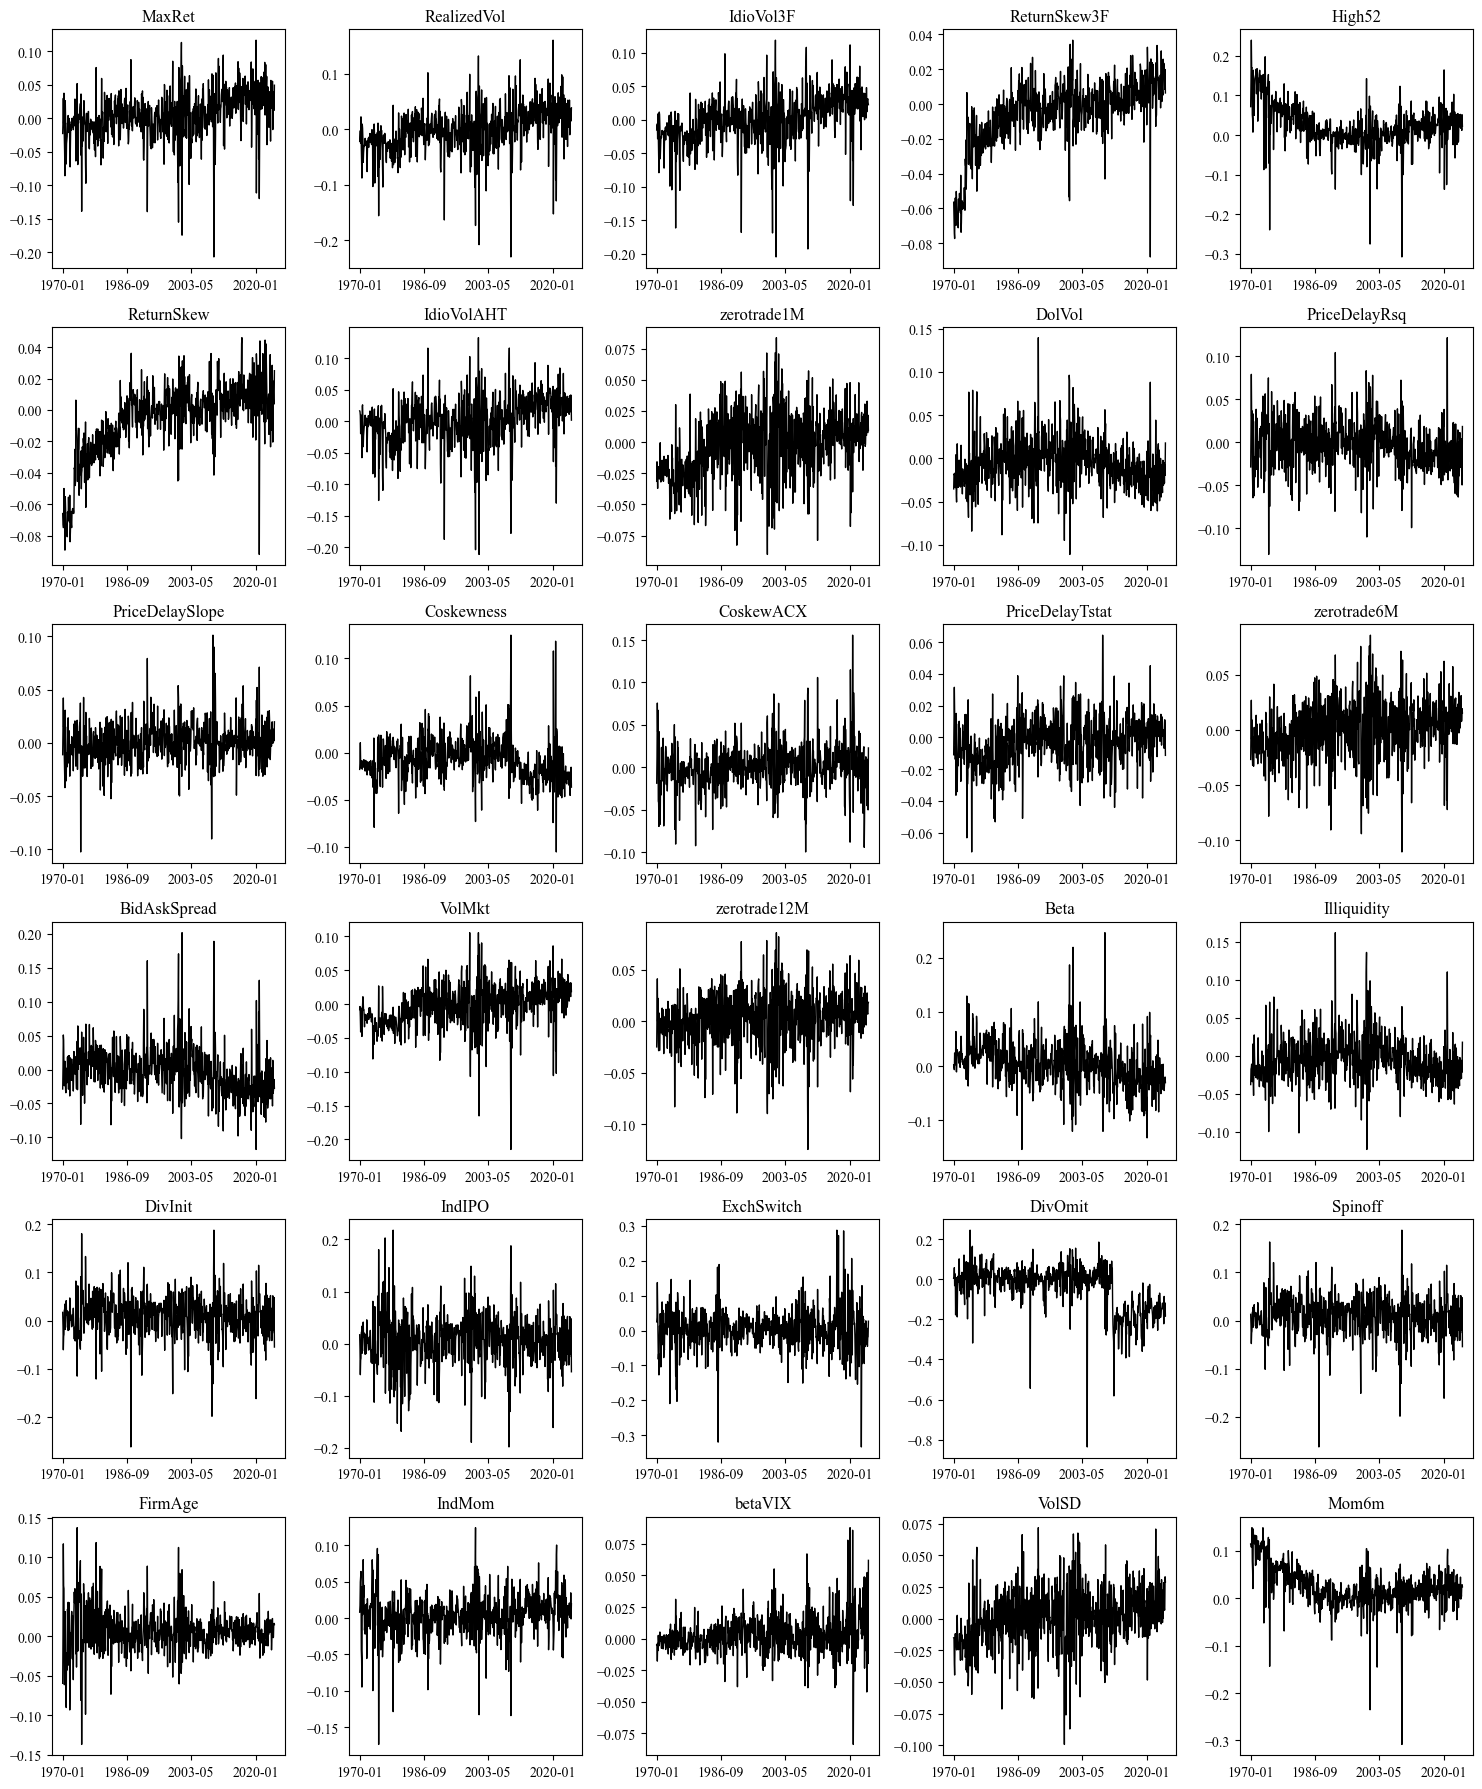

In [7]:
_, ax = plt.subplots(ncols=5, nrows=6, figsize=(15, 18))
plt.subplots_adjust(hspace=0.2, wspace=0.3)

df_lms.set_index('yyyymm').plot(subplots=True, ax=ax,
    legend=False, xlabel='', lw=1, color='#000')

for i in range(6):
    for j in range(5):
        ax[i, j].set_title(df_lms.columns[j+i*5+1])
plt.tight_layout()
# plt.show()
plt.savefig('./figures/LongShortLegRtns.png', dpi=300)

In [ ]:
# 从本地读取 numpy 数组
avg_pricing_loss, avg_port_loss = np.load('./cache/avg_losses_series.npy')

In [9]:
print(avg_pricing_loss, avg_port_loss, sep='\n')

[0.01730834 0.01501794 0.01260435 0.01088139 0.00983835 0.00924878
 0.0091216  0.00856453 0.00847435 0.00816712 0.00796677 0.00774741
 0.00768366 0.00751604 0.0075291  0.00736242 0.00744329 0.00724719
 0.00728093 0.00728265 0.00715419 0.00727463 0.00708827 0.00703962
 0.007117   0.00695797 0.0070114  0.00695571 0.00696616 0.00693318
 0.00679384 0.0067603  0.00683682 0.00671917 0.00686014 0.00664616
 0.00663167 0.00654666 0.00665995]
[-2.07391623e-08 -1.94333536e-08 -1.80193627e-08 -1.87811531e-08
 -4.30021169e-08 -2.14700943e-05 -7.15507613e-05 -1.03180178e-04
 -1.47022113e-04 -1.65075680e-04 -1.51613134e-04 -1.51350051e-04
 -1.52508402e-04 -1.36555977e-04 -1.42188134e-04 -1.41310474e-04
 -1.63099189e-04 -1.36677913e-04 -1.33031799e-04 -1.50984646e-04
 -1.37361383e-04 -1.55505047e-04 -1.39555349e-04 -1.28247837e-04
 -1.48770632e-04 -1.43188889e-04 -1.45980531e-04 -1.34622706e-04
 -1.50759066e-04 -1.32258987e-04 -1.37637724e-04 -1.31004405e-04
 -1.46566963e-04 -1.44606897e-04 -1.3737845

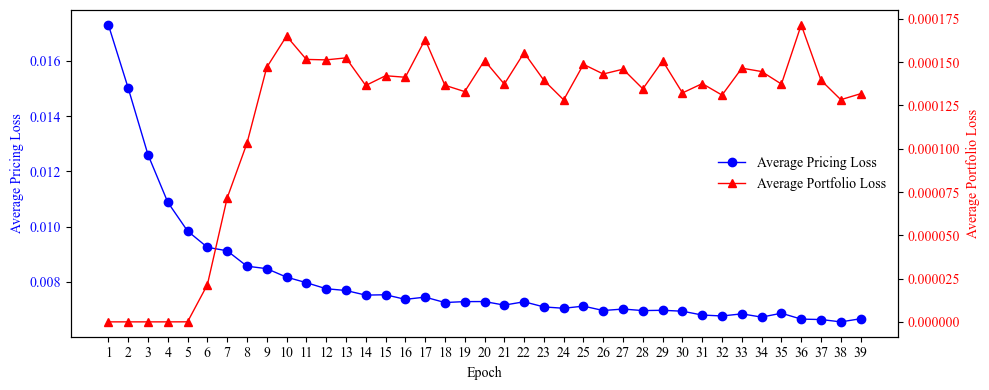

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Create the DataFrame
df_losses = pd.DataFrame({'Average Pricing Loss': avg_pricing_loss,
                         'Average Portfolio Loss': -avg_port_loss},
                        index=np.arange(1, len(avg_port_loss)+1).astype('str'))

# Plot Average Pricing Loss on left y-axis
ax1.plot(df_losses.index, df_losses['Average Pricing Loss'], 'bo-', label='Average Pricing Loss', lw=1)
ax1.set_xlabel('Index')
ax1.set_ylabel('Average Pricing Loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create second y-axis for Average Portfolio Loss
ax2 = ax1.twinx()
ax2.plot(df_losses.index, df_losses['Average Portfolio Loss'], 'r^-', label='Average Portfolio Loss', lw=1)
ax2.set_ylabel('Average Portfolio Loss', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right', edgecolor='none', facecolor='none')

ax1.set_xlabel('Epoch')

plt.tight_layout()
# plt.show()
plt.savefig('./figures/AvgTrainingLosses.png', dpi=300)

In [11]:
# load SDF network
import torch
import torch.nn as nn
import torch.nn.functional as F

class PricingKernel(nn.Module):
    def __init__(self):
        super().__init__()
        # 卷积层1：输入通道30，输出通道64，卷积核在高度方向为1，宽度方向设为3（可调整）
        self.conv1 = nn.Conv2d(in_channels=30, out_channels=64, kernel_size=(1,3), padding=(0,1))
        self.relu = nn.ReLU()
        # 全局平均池化：将每个通道的整个空间（1x923）池化为一个值
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))  # 输出每个通道为1x1
        # 注意：经过全局池化后，形状变为 [batch, 64, 1, 1]，然后我们需要将其展平，再通过一个全连接层得到30维输出
        self.fc = nn.Linear(64, 30)  # 将64个通道的特征映射到30个因子

    def forward(self, x):
        # x 形状: [batch, 30, 1, 923]
        x = self.conv1(x)  # 输出: [batch, 64, 1, 923] (因为padding=(0,1)保持宽度)
        x = self.relu(x)
        x = self.global_pool(x)  # 输出: [batch, 64, 1, 1]
        x = x.view(x.size(0), -1)  # 展平: [batch, 64]
        x = self.fc(x)  # 输出: [batch, 30]
        return x

pricing_model = PricingKernel()
pricing_model.load_state_dict(torch.load('./cache/models/final_pricing_model.pt'))

<All keys matched successfully>

In [12]:
pricing_model

PricingKernel(
  (conv1): Conv2d(30, 64, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
  (relu): ReLU()
  (global_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=64, out_features=30, bias=True)
)

In [13]:
# load X
X = torch.load('./cache/ForTrain/X.pt').type(torch.float32)
X = X.permute(0, 2, 1)  # 维度重排: (T, 30, 923)
X = X.unsqueeze(2)      # 在位置2插入新维度: (T, 30, 1, 923)

In [14]:
pricing_model.forward(X).shape

torch.Size([658, 30])

In [15]:
rtni = torch.load('./cache/ForTrain/rtni.pt')

In [16]:
sdf = (1 - (pricing_model.forward(X) * rtni).sum(dim=1)).detach().numpy()
dates = pd.read_csv('./cache/ForTrain/df_RtnI.csv')['yyyymm'].tolist()

sdf = pd.DataFrame({'yyyymm':dates, 'SDF':sdf})
sdf['yyyymm'] = pd.to_datetime(sdf['yyyymm'], format='%Y%m').dt.strftime('%Y-%m')

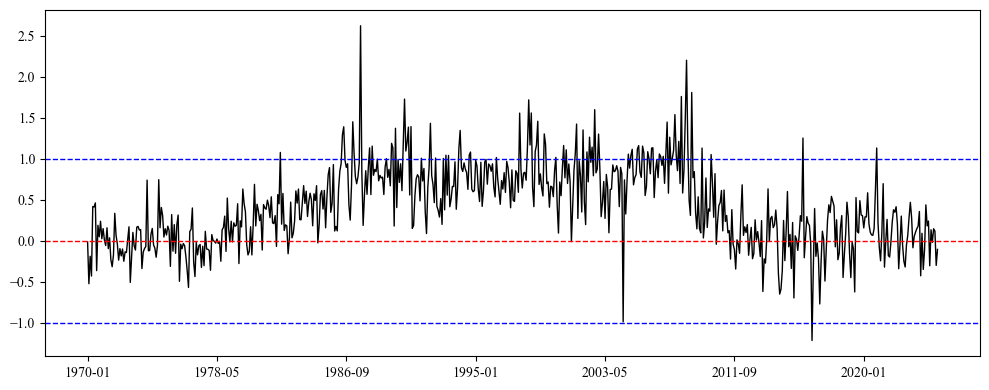

In [17]:
_, ax = plt.subplots(figsize=(10,4))
sdf.set_index('yyyymm').plot(ax=ax,xlabel='',lw=1,legend=False,c='#000')
ax.axhline(0, color='red', linestyle='--', lw=1)
ax.axhline(1, color='blue', linestyle='--', lw=1)
ax.axhline(-1, color='blue', linestyle='--', lw=1)
plt.tight_layout()
plt.savefig('./figures/StocasticDiscountFactor.png', dpi=300)